In [144]:
# @title bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [145]:
color_pal = sns.color_palette("Paired", 10)

color_pal

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509)]

O dataset

In [146]:
df = pd.read_csv('dataset/superstore.csv')

df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# limpeza do dataset

In [147]:
colunas_remover = ['Order ID', 'Country', 'Ship Date', 'Ship Mode', 'Customer ID', 'State', 'Postal Code', 'Region', 'Product ID','Country','Segment']

df = df.drop(colunas_remover, axis=1)

In [148]:
df.head()

,Row ID,Order Date,Customer Name,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,11/8/2016,Claire Gute,Henderson,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,11/8/2016,Claire Gute,Henderson,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,6/12/2016,Darrin Van Huff,Los Angeles,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,10/11/2015,Sean O'Donnell,Fort Lauderdale,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,10/11/2015,Sean O'Donnell,Fort Lauderdale,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [149]:
product_str = df['Product Name'].value_counts()

product_str

Product Name
Staple envelope                                                                        48
Staples                                                                                46
Easy-staple paper                                                                      46
Avery Non-Stick Binders                                                                20
Staples in misc. colors                                                                19
                                                                                       ..
Boston 1900 Electric Pencil Sharpener                                                   1
RCA ViSYS 25423RE1 Corded phone                                                         1
Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner     1
Newell 342                                                                              1
Eldon Jumbo ProFile Portable File Boxes Graphite/Black                                 

In [150]:
# Staples é o mais vendido em relação a qtd
df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)

Product Name
Staples                                                       215
Staple envelope                                               170
Easy-staple paper                                             150
Staples in misc. colors                                        86
KI Adjustable-Height Table                                     74
Avery Non-Stick Binders                                        71
Storex Dura Pro Binders                                        71
GBC Premium Transparent Covers with Diagonal Lined Pattern     67
Situations Contoured Folding Chairs, 4/Set                     64
Staple-based wall hangings                                     62
Name: Quantity, dtype: int64

In [151]:
#so o prod + vendido
df = df.loc[df['Product Name'] == 'Staples']

In [152]:
colunas_remover = ['Category', 'Sub-Category', 'Product Name']

df = df.drop(colunas_remover, axis=1)


In [153]:
#acertando o formato das datas
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day

df = df.sort_values(by='Order Date')

print('Menor data: ', df['Year'].min())
print('Maior data: ', df['Year'].max())

Menor data:  2014
Maior data:  2017


# Entendendo o Dataset / Análise Exploratória

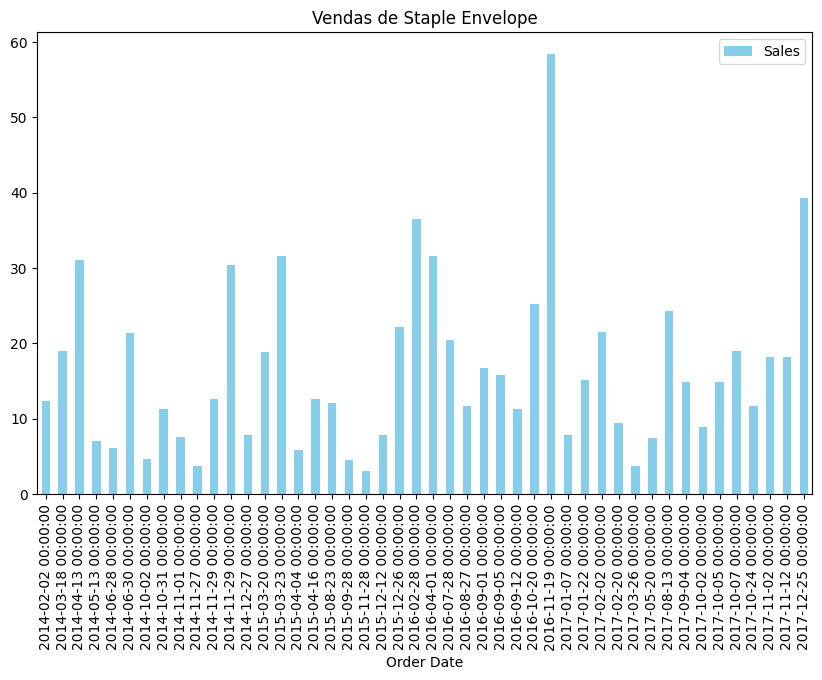

In [154]:
df.plot(kind='bar', x='Order Date', y='Sales', figsize=(10, 6), color='skyblue', title='Vendas de Staple Envelope')
plt.show()

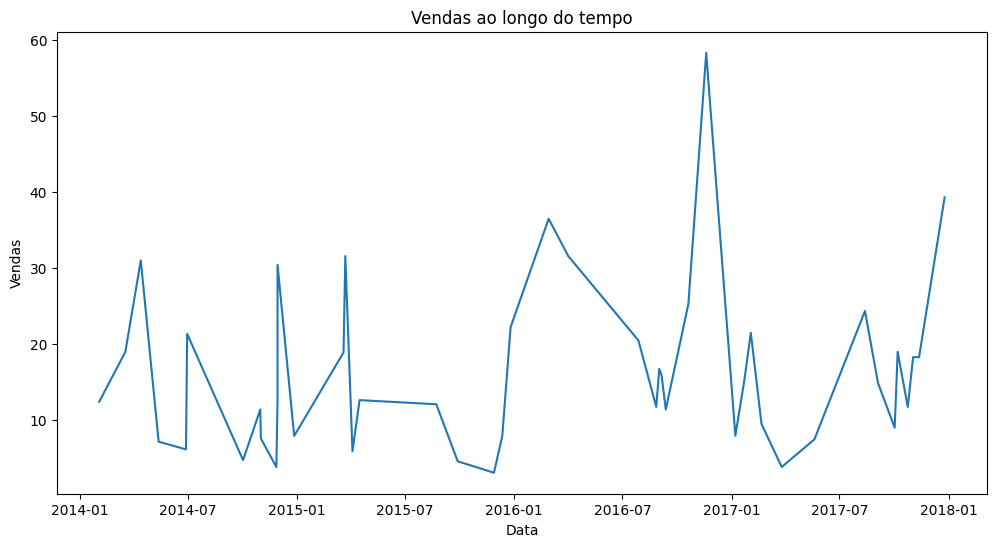

In [155]:
df_serie = df.groupby('Order Date')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df['Order Date'], df['Sales'])
plt.title('Vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.show()


In [156]:
print(df_serie.info())
print(df_serie.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  45 non-null     datetime64[ns]
 1   Sales       45 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 848.0 bytes
None
                Order Date      Sales
count                   45  45.000000
mean   2016-03-03 10:40:00  16.788222
min    2014-02-02 00:00:00   3.008000
25%    2014-12-27 00:00:00   7.860000
50%    2016-04-01 00:00:00  14.820000
75%    2017-02-20 00:00:00  21.312000
max    2017-12-25 00:00:00  58.368000
std                    NaN  11.723635


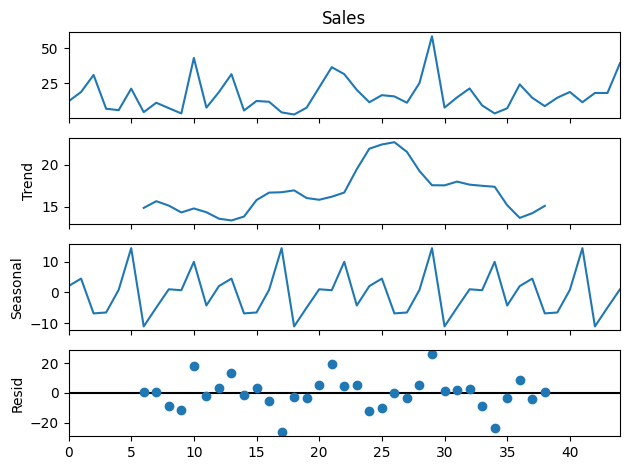

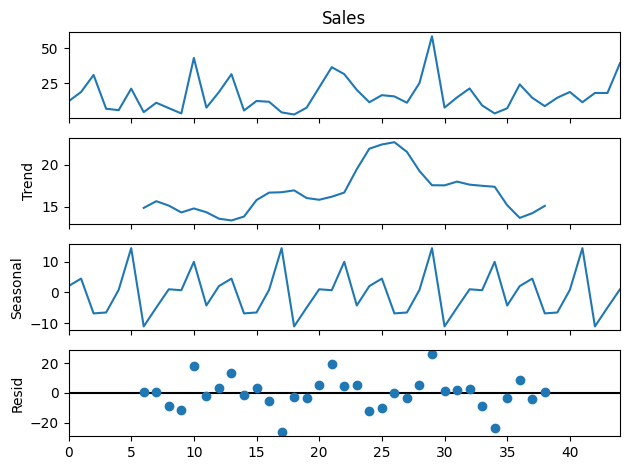

In [157]:
decomposition = seasonal_decompose(df_serie['Sales'], model='additive', period=12)
decomposition.plot()

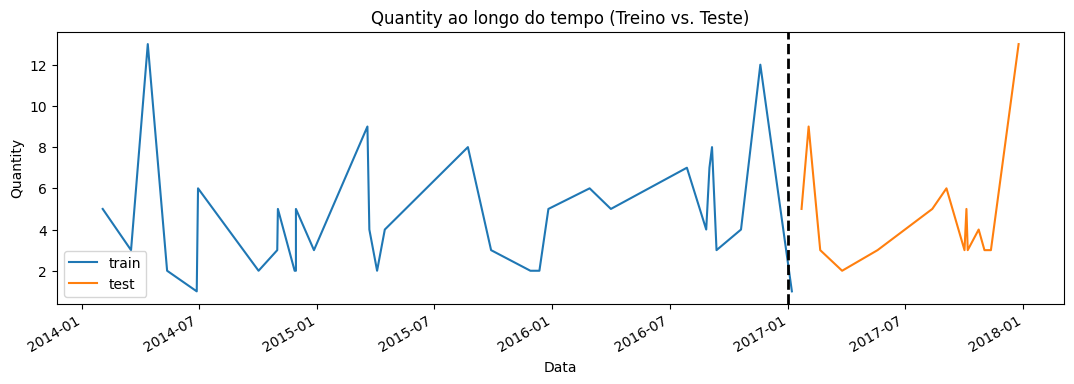

In [158]:
color_pal = ['#1f77b4', '#ff7f0e']

df.set_index('Order Date', inplace=True)

train = df.loc[df.index < '2017-01-12']
test = df.loc[df.index >= '2017-01-12']

fig, ax = plt.subplots(1, 1, figsize=(13, 4))
train['Quantity'].plot(ax=ax, color=color_pal[0])
test['Quantity'].plot(ax=ax, color=color_pal[1])
ax.axvline('2017-01-01', color='black', linestyle='--', lw=2)
ax.legend(['train', 'test'])
plt.xlabel('Data')
plt.ylabel('Quantity')
plt.title('Quantity ao longo do tempo (Treino vs. Teste)')
plt.show()

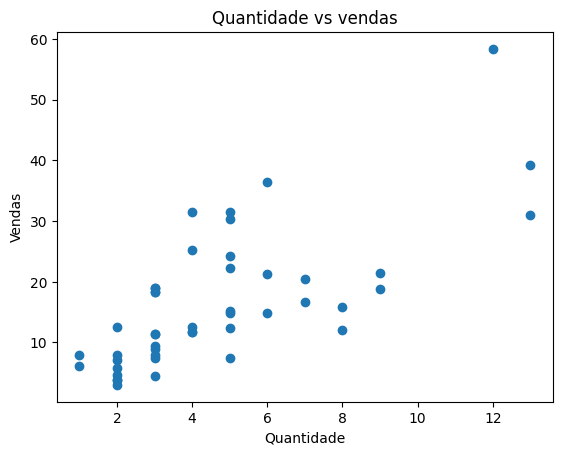

In [159]:
#dispersão
plt.scatter(df['Quantity'], df['Sales'])
plt.xlabel('Quantidade')
plt.ylabel('Vendas')
plt.title('Quantidade vs vendas')
plt.show()

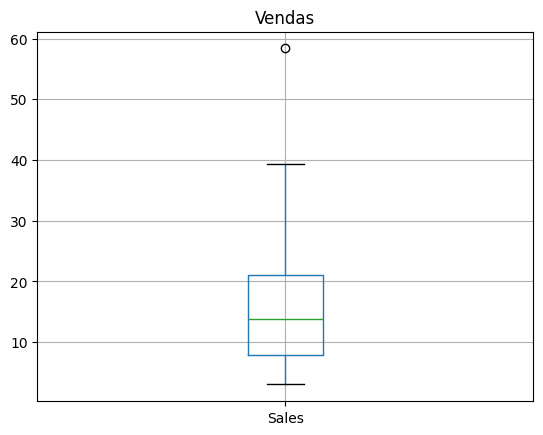

,Row ID,Customer Name,City,Sales,Quantity,Discount,Profit,Year,Month,Day
Order Date,,,,,,,,,,
2016-11-19,1109,Eric Hoffmann,Houston,58.368,12,0.2,21.888,2016,11,19


In [160]:
#outliers
df.boxplot(column=['Sales'])
plt.title('Vendas')
plt.show()

z_scores = stats.zscore(df['Sales'])
outliers = df[np.abs(z_scores) > 3]

outliers
     

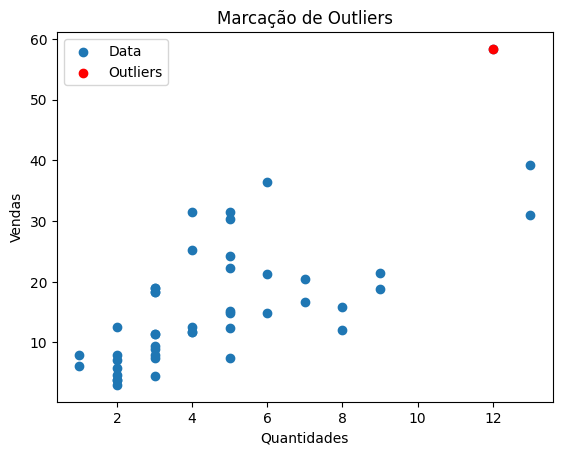

In [161]:
# Gráfico de dispersão com outliers destacados
plt.scatter(df['Quantity'], df['Sales'], label='Data')
plt.scatter(outliers['Quantity'], outliers['Sales'], color='red', label='Outliers')
plt.xlabel('Quantidades')
plt.ylabel('Vendas')
plt.title('Marcação de Outliers')
plt.legend()
plt.show()


In [162]:
#features e target
X = df[['Quantity', 'Discount', 'Profit']]
y = df['Sales']

#treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

#regressão linear
regres_linear = LinearRegression()
regres_linear.fit(x_treino, y_treino)

#previsões
y_prev = regres_linear.predict(x_teste)


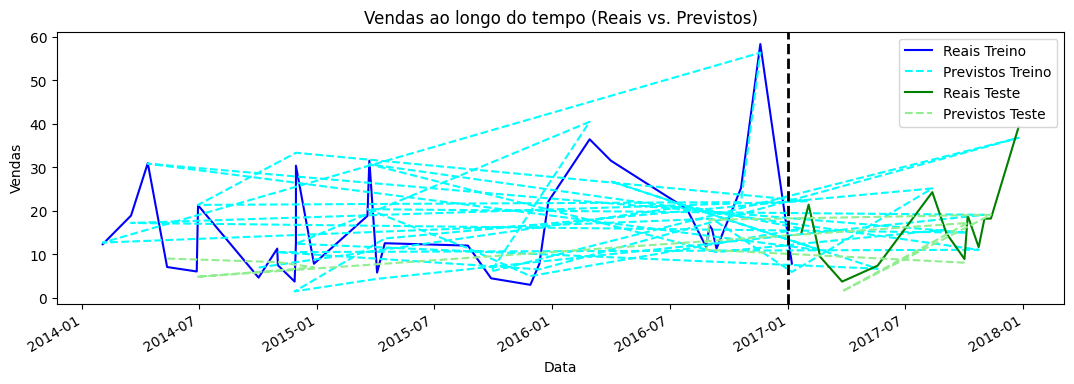

In [163]:
fig, ax = plt.subplots(1, 1, figsize=(13, 4))

#reais para o conjunto de treino
train['Sales'].plot(ax=ax, color='blue', label='Reais Treino')

#previstos para o conjunto de treino
train_pred = pd.Series(regres_linear.predict(x_treino), index=x_treino.index)
train_pred.plot(ax=ax, color='cyan', linestyle='--', label='Previstos Treino')

#reais para o conjunto de teste
test['Sales'].plot(ax=ax, color='green', label='Reais Teste')

#previstos para o conjunto de teste
test_pred = pd.Series(regres_linear.predict(x_teste), index=x_teste.index)
test_pred.plot(ax=ax, color='lightgreen', linestyle='--', label='Previstos Teste')

#divisão entre treino e teste
ax.axvline('2017-01-01', color='black', linestyle='--', lw=2)

ax.legend()
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Vendas ao longo do tempo (Reais vs. Previstos)')
plt.show()


In [164]:
#IQR (intervalo interquartil, é uma medida estatistica para dispersão dos dados)
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

#df sem outliers
df_sem_outliers = df[~((df['Sales'] < (Q1 - 1.5 * IQR)) | (df['Sales'] > (Q3 + 1.5 * IQR)))]

X_sem_outliers = df_sem_outliers[['Quantity', 'Discount', 'Profit']]
y_sem_outliers = df_sem_outliers['Sales']

x_treino_sem_outliers, x_teste_sem_outliers, y_treino_sem_outliers, y_teste_sem_outliers = train_test_split(X_sem_outliers, y_sem_outliers, test_size=0.2, random_state=42)

#treinando modelo sem outliers
model_sem_outliers = LinearRegression()
model_sem_outliers.fit(x_treino_sem_outliers, y_treino_sem_outliers)
y_pred_sem_outliers = model_sem_outliers.predict(x_teste_sem_outliers)
mse_without_outliers = mean_squared_error(y_teste_sem_outliers, y_pred_sem_outliers)
mse_with_outliers = mean_squared_error(y_teste, y_prev)

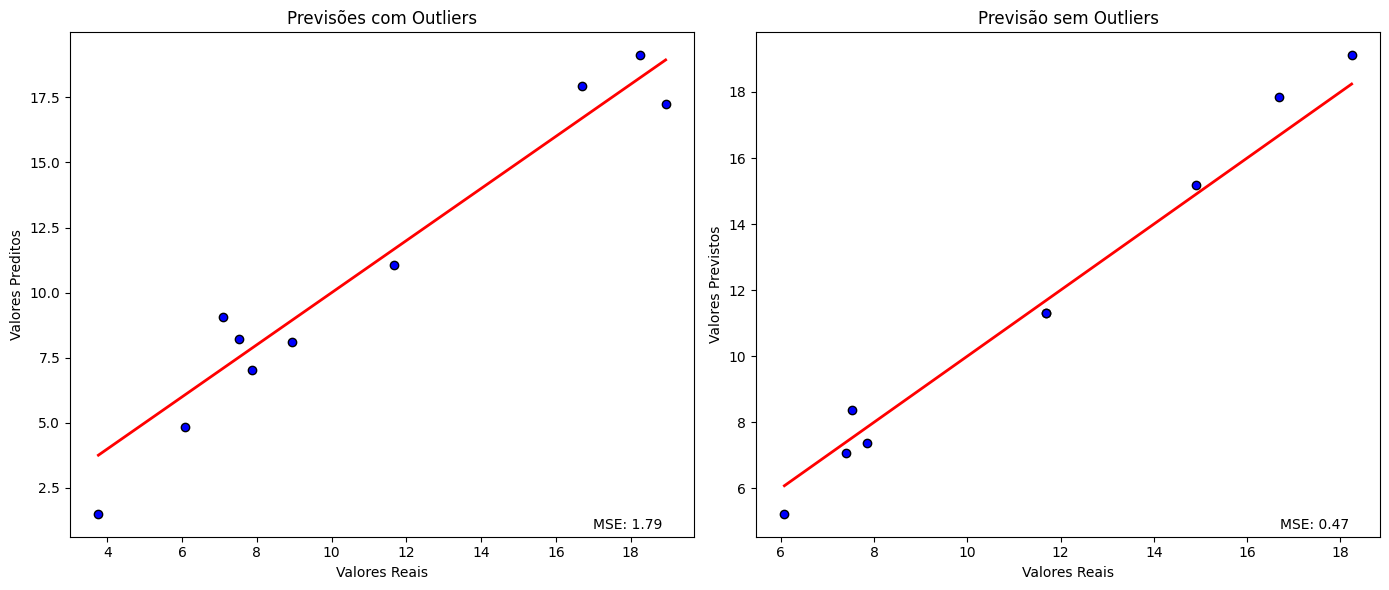

In [165]:
plt.figure(figsize=(14, 6))

#com outliers
plt.subplot(1, 2, 1)
plt.scatter(y_teste, y_prev, color='blue', edgecolor='k')
plt.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], color='red', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Previsões com Outliers')
plt.text(0.95, 0.01, f'MSE: {mse_with_outliers:.2f}', transform=plt.gca().transAxes, verticalalignment='bottom', horizontalalignment='right')

#sem outliers
plt.subplot(1, 2, 2)
plt.scatter(y_teste_sem_outliers, y_pred_sem_outliers, color='blue', edgecolor='k')
plt.plot([y_teste_sem_outliers.min(), y_teste_sem_outliers.max()], [y_teste_sem_outliers.min(), y_teste_sem_outliers.max()], color='red', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Previsão sem Outliers')
plt.text(0.95, 0.01, f'MSE: {mse_without_outliers:.2f}', transform=plt.gca().transAxes, verticalalignment='bottom', horizontalalignment='right')

plt.tight_layout()
plt.show()


In [166]:
#métricas de erro
mse = mean_squared_error(y_teste, y_prev)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_teste, y_prev)
r2 = r2_score(y_teste, y_prev)

print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")


Erro Quadrático Médio (MSE): 1.79
Raiz do Erro Quadrático Médio (RMSE): 1.34
Erro Absoluto Médio (MAE): 1.23
Coeficiente de Determinação (R²): 0.93


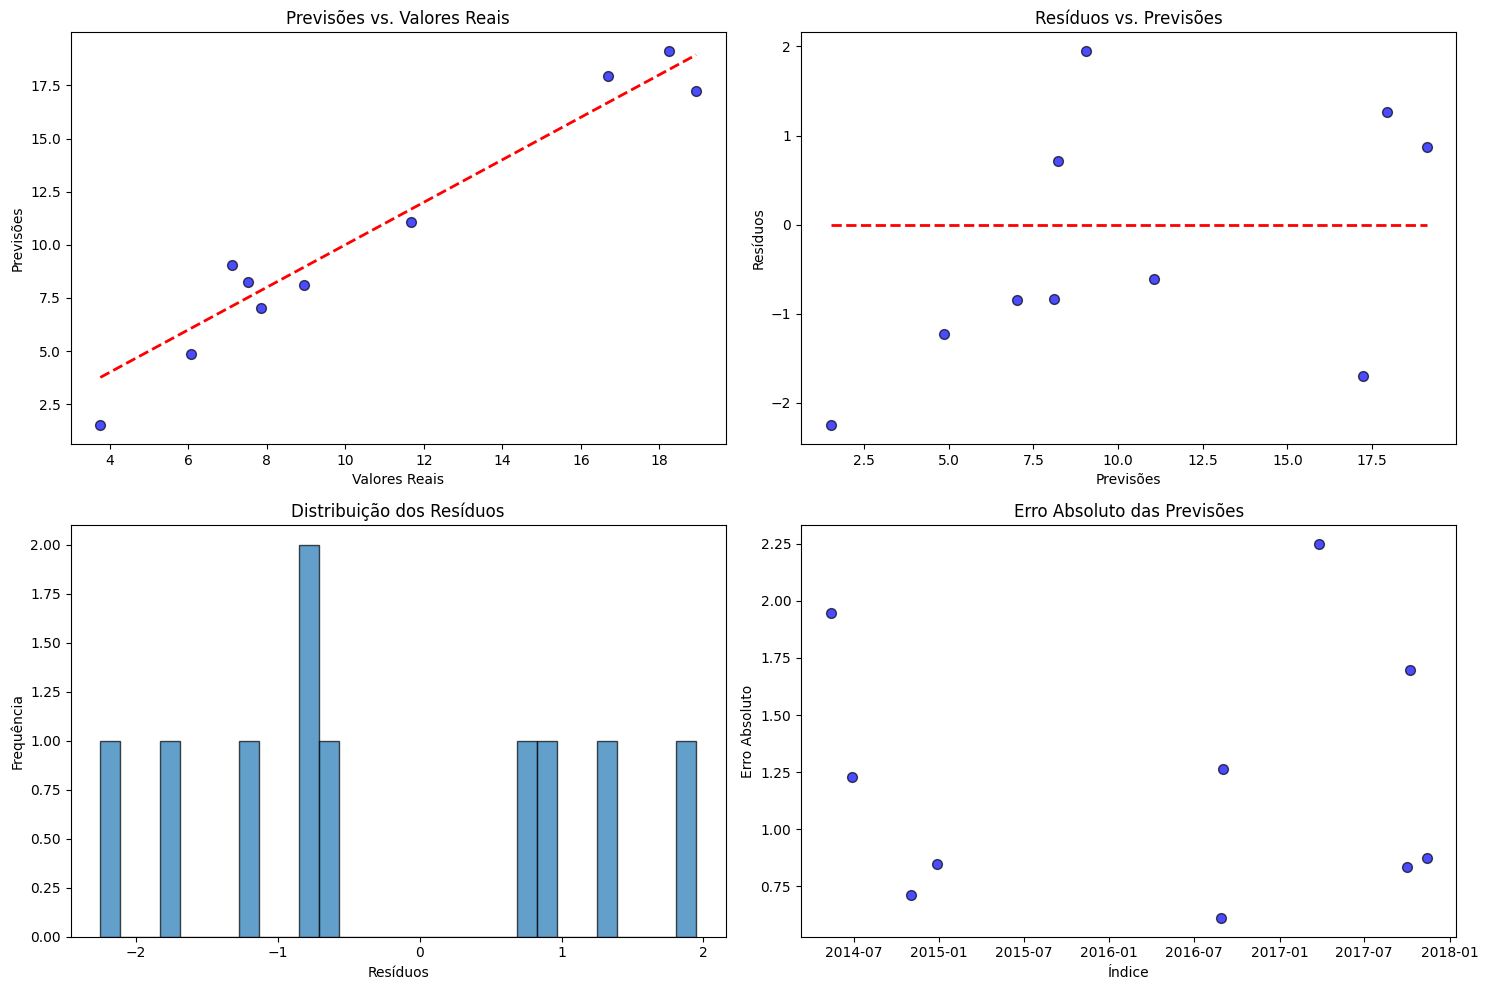

In [167]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(y_teste, y_prev, color='blue', edgecolor='k', s=50, alpha=0.7)
plt.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais')

plt.subplot(2, 2, 2)
plt.scatter(y_prev, y_prev - y_teste, color='blue', edgecolor='k', s=50, alpha=0.7)
plt.hlines(y=0, xmin=y_prev.min(), xmax=y_prev.max(), color='red', linestyle='--', linewidth=2)
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Previsões')

plt.subplot(2, 2, 3)
plt.hist(y_prev - y_teste, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Distribuição dos Resíduos')

plt.subplot(2, 2, 4)
plt.scatter(y_teste.index, np.abs(y_prev - y_teste), color='blue', edgecolor='k', s=50, alpha=0.7)
plt.xlabel('Índice')
plt.ylabel('Erro Absoluto')
plt.title('Erro Absoluto das Previsões')

plt.tight_layout()
plt.show()


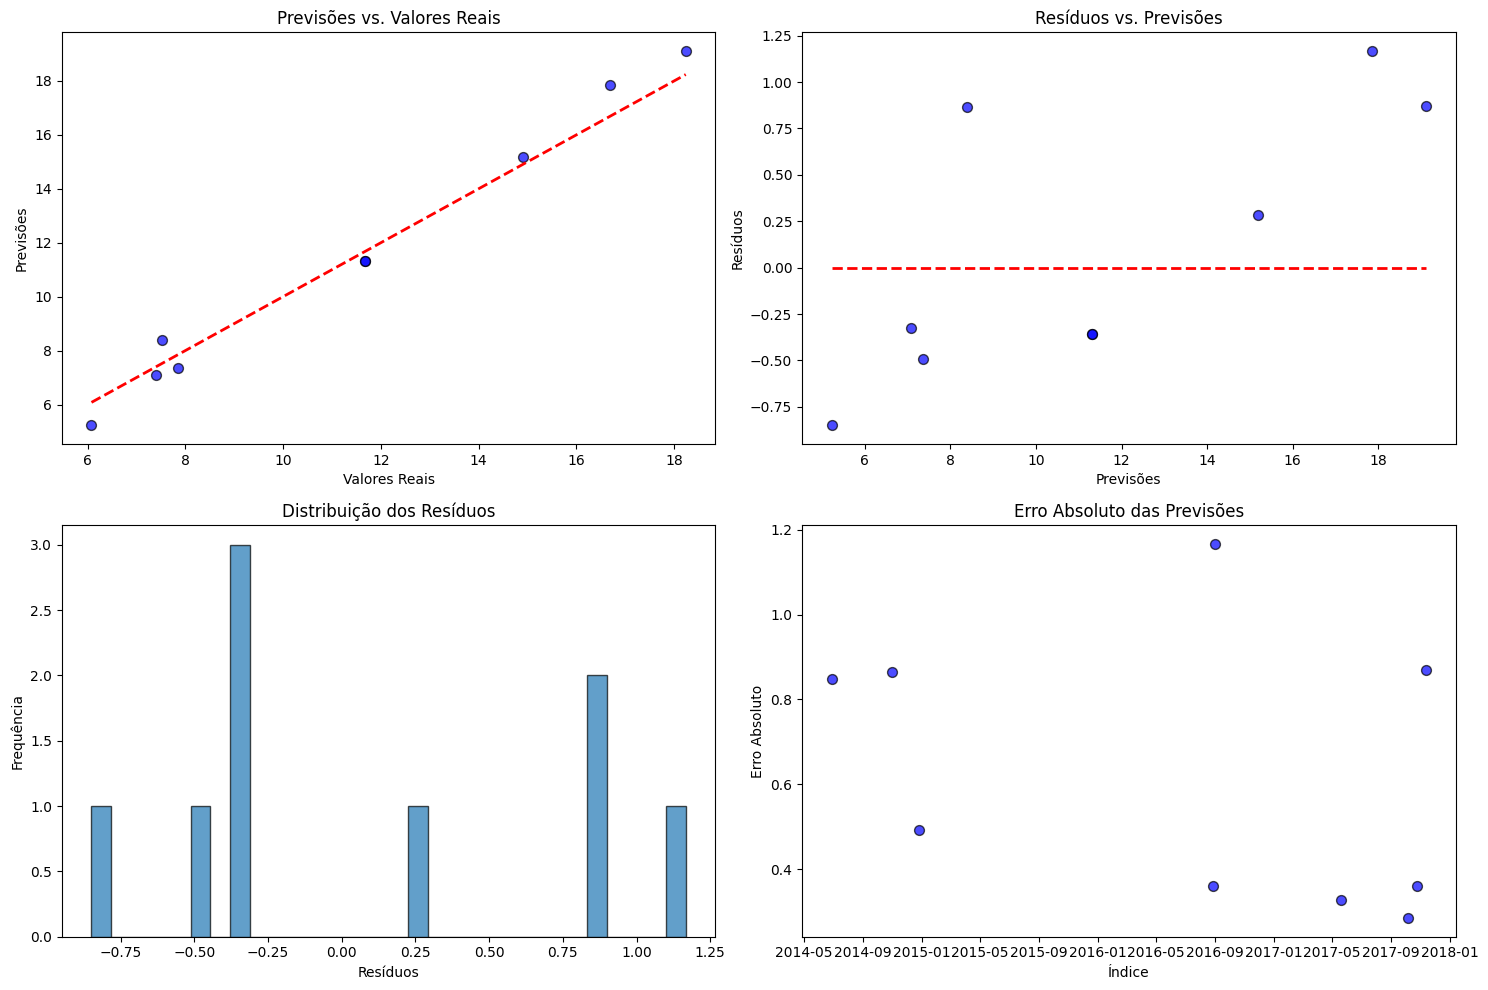

In [168]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(y_teste_sem_outliers, y_pred_sem_outliers, color='blue', edgecolor='k', s=50, alpha=0.7)
plt.plot([y_teste_sem_outliers.min(), y_teste_sem_outliers.max()], [y_teste_sem_outliers.min(), y_teste_sem_outliers.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais')

plt.subplot(2, 2, 2)
plt.scatter(y_pred_sem_outliers, y_pred_sem_outliers - y_teste_sem_outliers, color='blue', edgecolor='k', s=50, alpha=0.7)
plt.hlines(y=0, xmin=y_pred_sem_outliers.min(), xmax=y_pred_sem_outliers.max(), color='red', linestyle='--', linewidth=2)
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Previsões')

plt.subplot(2, 2, 3)
plt.hist(y_pred_sem_outliers - y_teste_sem_outliers, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Distribuição dos Resíduos')

plt.subplot(2, 2, 4)
plt.scatter(y_teste_sem_outliers.index, np.abs(y_pred_sem_outliers - y_teste_sem_outliers), color='blue', edgecolor='k', s=50, alpha=0.7)
plt.xlabel('Índice')
plt.ylabel('Erro Absoluto')
plt.title('Erro Absoluto das Previsões')

plt.tight_layout()
plt.show()

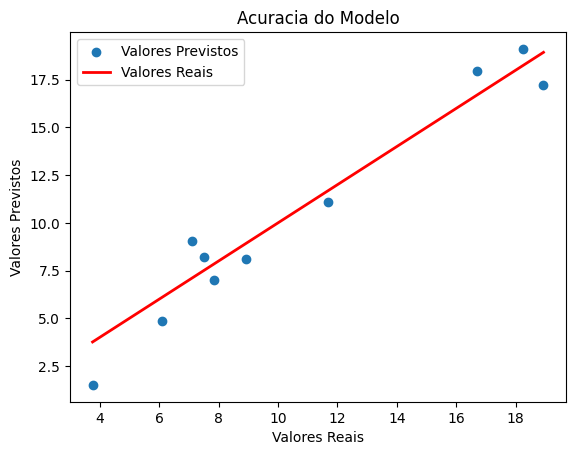

In [172]:
plt.scatter(y_teste, y_prev, label='Valores Previstos')
plt.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], color='red', linewidth=2, label='Valores Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Acuracia do Modelo')
plt.legend()
plt.show()

In [170]:
print("MSE = Mean Squared Error")
print("MSE com outliers:", mse_with_outliers)
print("MSE sem outliers:", mse_without_outliers)


MSE = Mean Squared Error
MSE com outliers: 1.7899832086967375
MSE sem outliers: 0.4749777601357852


In [182]:
print(12.35/5)
print(18.93/3)
print(30.92/13)
print(31.560	/4)

2.4699999999999998
6.31
2.3784615384615386
7.89


In [199]:
dict_preco_unit = {}

for i, row in df.iterrows():
    dict_preco_unit[row['Row ID']] = (row['City'],row['Sales'] / row['Quantity'])

In [ ]:
dict_preco_unit

In [196]:
print(f"Min value = {min(dict_preco_unit.values())}")
print(f"Max value = {max(dict_preco_unit.values())}")

Min value = 1.5039999999999998
Max value = 7.89


In [ ]:
df['Unit_Price'] = df['Sales'] / df['Quantity']
df['Unit_Price']

In [204]:
df['Cost'] = df['Sales'] - df['Profit'] 

L = R - C

C = R - L

In [206]:
df.head()

,Row ID,Customer Name,City,Sales,Quantity,Discount,Profit,Year,Month,Day,Unit_Price,Cost
Order Date,,,,,,,,,,,,
2014-02-02,1704,Cynthia Delaney,San Diego,12.350,5,0.0,5.8045,2014,2,2,2.470,6.5455
2014-03-18,2702,Sean Miller,Jacksonville,18.936,3,0.2,5.9175,2014,3,18,6.312,13.0185
2014-04-13,343,Jonathan Doherty,Philadelphia,30.992,13,0.2,10.0724,2014,4,13,2.384,20.9196
2014-05-13,1887,Erica Hernandez,Hialeah,7.104,2,0.2,2.3976,2014,5,13,3.552,4.7064
2014-06-28,2924,Rob Williams,Detroit,6.080,1,0.0,3.0400,2014,6,28,6.080,3.0400
